Self organising maps are an unsupervised method that aims to primarily visualize the data. because similar data instances are mapped to neighnboring regions, it can be easily used as a clustering method.
In this notebook we will cluster the iris dataset.

First, let's load the data and train our SOM:

In [48]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Solution 1

The first approch is to build a SOM with as many neurons as the targeted number of clusters.
We will then consider all the sample mapped into a specific neuron as a cluster.

In [49]:
from lightSOM import SOM
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')

data = data.values
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
# Initialization and training
som_shape = (1, 3)

net=SOM().create(1, 3, data, pci=True,pbc=False)

net.train(0.5, start_sigma=0.5, epochs=500, random_order=True)

Periodic Boundary Conditions inactive.
The weights will be initialised with PCA.
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.5028226019638045

 topological error: 0.0
Training SOM... done!


To identify each cluster, we will translate the bidimensional indexes of the neurons on the SOM into a monodimentional indexes:

In [50]:
# each neuron represents a cluster
winner_coordinates = np.array([net.find_bmu(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
winner_coordinates

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

We can plot each cluster with a different color:

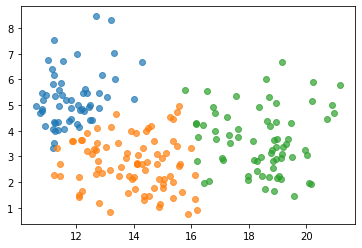

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)


## Solution 2
Build a regular NxN SOM, cluster the weights and then project the data into the current cluster.

In [53]:
net=SOM().create(20, 20, data, pci=True,pbc=False)

net.train(0.5, start_sigma=0.5, epochs=1000, random_order=True)

Periodic Boundary Conditions inactive.
The weights will be initialised with PCA.
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.11175768776817485

 topological error: 0.13333333333333333
Training SOM... done!


In [54]:
from lightSOM.visualization.som_view import SOMView
vhts  = SOMView(net, 10,10, text_size=10)
vhts.plot_cluster_map(n_clusters=3, anotate=True)

AttributeError: 'Nodes' object has no attribute 'dim'